In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Real-estate.csv to Real-estate.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('Real-estate.csv')
df = df.drop('No', axis = 1)

In [ ]:
for col in df.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(df[col])

    print("Datatype of {} is: ".format(col), df[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(df[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), df[col].shape[0] - total_null)

    print("---------------")

Datatype of X1 transaction date is:  float64
Number of unique values for X1 transaction date are:  12
Number of missing entries for X1 transaction date are:  0
Number of non-missing entries for X1 transaction date are:  414
---------------
Datatype of X2 house age is:  float64
Number of unique values for X2 house age are:  236
Number of missing entries for X2 house age are:  0
Number of non-missing entries for X2 house age are:  414
---------------
Datatype of X3 distance to the nearest MRT station is:  float64
Number of unique values for X3 distance to the nearest MRT station are:  259
Number of missing entries for X3 distance to the nearest MRT station are:  0
Number of non-missing entries for X3 distance to the nearest MRT station are:  414
---------------
Datatype of X4 number of convenience stores is:  int64
Number of unique values for X4 number of convenience stores are:  11
Number of missing entries for X4 number of convenience stores are:  0
Number of non-missing entries for X4

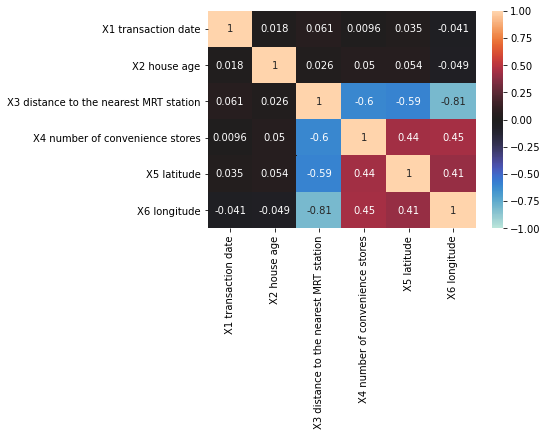

In [ ]:
# Calculating correlation between all columns
var_corr = df.corr()

# Plotting correlation heatmap
sns.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0) 

In [ ]:
# Extracting the label column
Y = df['Y house price of unit area']

# Dropping the label column from the main dataset
df = df.drop('Y house price of unit area', axis = 1)
display(df)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
# Converting the data into numpy arrays
X = np.array(df)
Y = np.array(Y)

# Reshaping the label array
Y = np.reshape(Y, (Y.shape[0], 1))

print(X.shape)
print(Y.shape)

(414, 6)
(414, 1)


In [ ]:
# Splitting the data into train and test sets
def data_split(test_split = 0.2):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_split, shuffle = True)
    return X_train, X_test, Y_train, Y_test

# Ridge Regression Function

In [ ]:
# Function to carry out ridge regression with regularization parameter alpha
def ridge_reg(X, Y, alpha):
    
    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X.shape[0], 1))
    X_new = np.concatenate((bias_vector, X), axis = 1)
    
    # Creating an identity matrix with same dimensions as X_new
    I = np.identity(X_new.shape[1])
    I[0][0] = 0

    # Computing betas using the formula for ridge regression
    beta = np.linalg.multi_dot((np.linalg.inv(np.dot(np.transpose(X_new), X_new) + alpha*I), np.transpose(X_new), Y))
    return beta

# LASSO Regression Function

In [ ]:
# Function to carry out lasso regression with regularization parameter alpha
def lasso_reg(X, Y, alpha):

    # Creating an instance of LASSO optimiser
    clf = Lasso(alpha=alpha)

    # Fitting the data to get the best line
    clf.fit(X, Y)
    
    coef = clf.coef_
    intercept = clf.intercept_

    coef = np.reshape(coef, (coef.shape[0], 1))
    intercept = np.reshape(intercept, (intercept.shape[0], 1))

    return coef, intercept

# Error Function

In [ ]:
# To calculate the squared error between predicted and actual values
def error(y_pred, y_actual):
    
    error_vector = y_actual - y_pred
    
    # Computing using the formula for MSE
    MSE = np.dot(np.transpose(error_vector), error_vector)*(1/float(len(error_vector)))
    return MSE

# Coefficient of Determination Function

In [ ]:
# To calculate the coefficient of determinaiton
def coef_det(y_pred, y_actual):

    # Creating an array with elements as average Y values
    y_mean = np.mean(y_actual)*np.ones((y_actual.shape[0], 1))
    
    # Deviation from mean explained by model
    model_exp = y_pred - y_mean
    SSM = np.dot(np.transpose(model_exp), model_exp)
    
    # Actual deviation from mean
    total_exp = y_actual - y_mean
    SST = np.dot(np.transpose(total_exp), total_exp)

    # Using formula for coefficient of determinaiton
    return SSM[0][0]/SST[0][0]

# Simple Linear Regression

In [ ]:
# Training a simple linear regression model with alpha = 0
X_train, X_test, Y_train, Y_test = data_split()
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

beta = ridge_reg(X_train, Y_train, alpha = 0)
beta = np.reshape(beta, (7, 1))

print(f"Coefficients corresponding to different features are: {beta[1:]}")
print(f"Intercept corresponding to the trained model is: {beta[0]}")

Coefficients corresponding to different features are: [[ 1.31194079]
 [-3.15036282]
 [-5.86790206]
 [ 3.13673826]
 [ 2.33015385]
 [ 0.09343339]]
Intercept corresponding to the trained model is: [38.0347432]


In [ ]:
# Adding a column of ones to account for the constant
bias_vector = np.ones((X_test.shape[0], 1))
X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

# Using the calculated beta values to make predictions on the test dataset
Y_test_pred = np.dot(X_test_new, beta)
print(f"Predicted prices for houses in the test dataset are: {Y_test_pred}")

Predicted prices for houses in the test dataset are: [[45.4501645 ]
 [37.60351723]
 [37.49327408]
 [50.56704317]
 [17.54721654]
 [11.41450791]
 [48.86173416]
 [48.26120021]
 [53.90978198]
 [42.42087582]
 [11.72808794]
 [47.88211258]
 [28.97938673]
 [19.24979154]
 [53.01473791]
 [39.74431195]
 [42.51759868]
 [47.75000809]
 [44.16277657]
 [33.78104524]
 [31.51169389]
 [46.93713185]
 [45.73257297]
 [44.84755063]
 [46.09755252]
 [42.76209453]
 [33.9747766 ]
 [40.8180976 ]
 [17.57381405]
 [40.74106862]
 [49.9132856 ]
 [43.22364213]
 [18.87898692]
 [31.86627339]
 [48.27180333]
 [47.24477414]
 [35.75810436]
 [45.27653158]
 [15.98071185]
 [34.31603175]
 [48.02814863]
 [43.97208094]
 [31.05004597]
 [38.90069384]
 [43.25917237]
 [43.55570758]
 [44.14332183]
 [38.80524632]
 [31.33776947]
 [36.63686877]
 [44.67584419]
 [45.15020287]
 [44.32838627]
 [37.71864115]
 [33.92718707]
 [18.22081037]
 [45.11994065]
 [14.82492441]
 [32.61188338]
 [31.22461817]
 [43.27110098]
 [50.20141865]
 [41.05066165]
 [

In [ ]:
# Calculating MSE Loss for the test dataset
loss = error(Y_test_pred, Y_test)
print(f"The MSE Loss for the simple linear regression model is: {loss[0][0]}")

# Calculating coefficient of determination for the test dataset
r_squared = coef_det(Y_test_pred, Y_test)
print(f"The coefficient of determination for the simple linear regression model is: {r_squared}")

The MSE Loss for the simple linear regression model is: 46.000528024125025
The coefficient of determination for the simple linear regression model is: 0.6620456059555128


# Simple Linear Regression For Different Train-Test Splits

In [ ]:
test_splits = [0.4, 0.3, 0.1]

for test_split in test_splits:
    
    X_train, X_test, Y_train, Y_test = data_split(test_split = test_split)
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)

    beta = ridge_reg(X_train, Y_train, alpha = 0)
    beta = np.reshape(beta, (7, 1))

    print(f"Test size: {test_split}")
    print(f"Coefficients corresponding to different features are: {beta[1:]}")
    print(f"Intercept corresponding to the trained model is: {beta[0]}")

    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X_test.shape[0], 1))
    X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

    Y_test_pred = np.dot(X_test_new, beta)
    print(f"Predicted prices for houses in the test dataset are: {Y_test_pred}")

    # Calculating MSE Loss for the test dataset
    loss = error(Y_test_pred, Y_test)
    print(f"The MSE Loss for the simple linear regression model is: {loss[0][0]}")

    # Calculating coefficient of determination for the test dataset
    r_squared = coef_det(Y_test_pred, Y_test)
    print(f"The coefficient of determination for the simple linear regression model is: {r_squared}")
    print("---------------------")

Test size: 0.4
Coefficients corresponding to different features are: [[ 1.2831199 ]
 [-3.12697024]
 [-4.34247789]
 [ 4.05709712]
 [ 2.86536009]
 [ 1.02389738]]
Intercept corresponding to the trained model is: [38.16129032]
Predicted prices for houses in the test dataset are: [[25.2142571 ]
 [31.90167334]
 [35.06040097]
 [42.55129018]
 [46.50179254]
 [48.35285272]
 [42.918223  ]
 [47.58892227]
 [29.46917058]
 [39.49107113]
 [44.9169059 ]
 [31.7484986 ]
 [29.87795283]
 [48.21209802]
 [35.19465699]
 [48.33432087]
 [36.83561164]
 [24.17728593]
 [32.68216663]
 [11.82504793]
 [52.85360712]
 [14.91802168]
 [35.82913024]
 [44.02117455]
 [37.38244801]
 [43.91673637]
 [50.42762383]
 [16.00827528]
 [38.25117626]
 [39.52708546]
 [43.87561348]
 [23.4898124 ]
 [48.85542461]
 [33.58445756]
 [ 8.7717703 ]
 [54.82822553]
 [41.13925317]
 [38.96451858]
 [48.97683752]
 [50.95480499]
 [49.50217723]
 [36.948219  ]
 [37.63229463]
 [37.72425584]
 [39.64705284]
 [34.19901763]
 [33.70766459]
 [41.10533897]
 [42

# Ridge and LASSO Regression For Different Train-Test Splits

In [ ]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

for test_split in test_splits:
    
    for alpha in alphas:

        print(f"Test split value: {test_split}")
        print(f"Alpha (regularization parameter) value: {alpha}")

        X_train, X_test, Y_train, Y_test = data_split(test_split = test_split)
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)

        # Carrying out ridge regression on the train dataset
        beta = ridge_reg(X_train, Y_train, alpha = alpha)
        beta = np.reshape(beta, (7, 1))

        # Adding a column of ones to account for the constant
        bias_vector = np.ones((X_test.shape[0], 1))
        X_test_new = np.concatenate((bias_vector, X_test), axis = 1)
        Y_test_pred = np.dot(X_test_new, beta)
        
        # Calculating MSE Loss for the test dataset
        loss = error(Y_test_pred, Y_test)
        print(f"The MSE Loss for the ridge regression model is: {loss[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r_squared = coef_det(Y_test_pred, Y_test)
        print(f"The coefficient of determination for the ridge regression model is: {r_squared}")
        print("xxxxx")

        # Carrying out LASSO regression on the train dataset
        coef, intercept = lasso_reg(X_train, Y_train, alpha)

        intercept_vector = intercept*np.ones((X_test.shape[0], 1))
        Y_test_pred = np.dot(X_test, coef) + intercept_vector

        # Calculating MSE Loss for the test dataset
        loss = error(Y_test_pred, Y_test)
        print(f"The MSE Loss for the LASSO regression model is: {loss[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r_squared = coef_det(Y_test_pred, Y_test)
        print(f"The coefficient of determination for the LASSO regression model is: {r_squared}")
        print("-----------------------")

Test split value: 0.4
Alpha (regularization parameter) value: 0.001
The MSE Loss for the ridge regression model is: 69.41790922602965
The coefficient of determination for the ridge regression model is: 0.6068269476369019
xxxxx
The MSE Loss for the LASSO regression model is: 69.40984572304455
The coefficient of determination for the LASSO regression model is: 0.6065692767340506
-----------------------
Test split value: 0.4
Alpha (regularization parameter) value: 0.005
The MSE Loss for the ridge regression model is: 82.03358416247585
The coefficient of determination for the ridge regression model is: 0.5002158571394575
xxxxx
The MSE Loss for the LASSO regression model is: 82.02887226440099
The coefficient of determination for the LASSO regression model is: 0.4991930125265837
-----------------------
Test split value: 0.4
Alpha (regularization parameter) value: 0.01
The MSE Loss for the ridge regression model is: 95.50762460184997
The coefficient of determination for the ridge regression m